
# <center>**BIOLOGICAL FEATURES VS PHYSICAL ATTRIBUTES OF THE GENOME**
</center>

<center>
<img src="genome_arc.jpg" width='70%'>
</center>

## **Scope of the project**


The human genome, comprising thousands of genes packaged into 23 chromosomes, resides intricately folded within the nucleus of every cell. Beyond its linear sequence, the genome's three-dimensional (3D) organization plays a pivotal role in regulating biological processes. Research over the past decade has revealed that the 3D configuration of the genome is not random; rather, it is highly conserved across cells, individuals, and even species, despite undergoing genetic and epigenetic modifications. This conserved yet dynamic architecture suggests that 3D genome organization is fundamental to cellular function.

The scope of this research project is to lay the groundwork for future studies that will explore the role of 3D genome organization in biological processes. Understanding this relationship could unveil critical insights into the interplay between genome structure and function. Furthermore, this approach can be extended to study abnormal genomic configurations in cancer cells, enabling breakthroughs in drug discovery and disease modeling. By integrating computational tools and advanced experimental methods, this project aims to facilitate the development of predictive models using machine learning to understand cell functioning and to devise therapeutic strategies at the genomic level.

This research holds the potential to revolutionize how we study the genome's role in health and disease, offering a novel perspective on the interdependence of structure and function in the genetic blueprint of life.
<br>
<br>
<hr>


## About the data

The **`genome_table_mapped.csv`** file contains detailed information about mouse genes, combining both genetic attributes and 3D spatial characteristics derived from prior research. This dataset was generated in a previous project using MySQL.

### Column Descriptions

1. **`gene_id`**  
   - **Definition**: Ensembl gene ID, a universal identifier for genes.  
   - **Purpose**: Ensures consistent and standardized gene representation across datasets.  

2. **`gene_name`**  
   - **Definition**: Standardized gene name.  
   - **Purpose**: Provides a human-readable reference for each gene.  

3. **`gene_start`**  
   - **Definition**: Start position of the gene in base pairs (bp) on its chromosome.  

4. **`gene_end`**  
   - **Definition**: End position of the gene in bp.  

5. **`strand`**  
   - **Definition**: Indicates the DNA strand where the gene is located.  
     - `+1`: Positive strand.  
     - `-1`: Negative strand.  
   - **Purpose**: Crucial for understanding gene transcription orientation.  

6. **`chr`**  
   - **Definition**: Chromosome on which the gene resides.  

7. **`TSS` (Transcription Start Site)**  
   - **Definition**: The site where transcription of the gene begins.  
   - **Special Case**: Equal to `gene_start` for positive strands and `gene_end` for negative strands.  

8. **`TES` (Transcription End Site)**  
   - **Definition**: The site where transcription of the gene ends.  
   - **Special Case**: Equal to `gene_end` for positive strands and `gene_start` for negative strands.  

9. **`gene_length`**  
   - **Definition**: Length of the gene, calculated as the absolute value of `gene_end - gene_start`.  

10. **`tss_bin`**  
    - **Definition**: Transcription Start Site binned at a 40kb resolution.  
    - **Purpose**: Maps physical attributes to regions of interest.  

11. **`fpkm` (Fragments Per Kilobase of transcript per Million mapped reads)**  
    - **Definition**: A measure of gene expression.  

12. **`esc_max_exp`**  
    - **Definition**: Maximum expression level of the gene in mouse Embryonic Stem Cells.  

13. **`npc_max_exp`**  
    - **Definition**: Maximum expression level of the gene in Neural Progenitor Cells.  

14. **`expression_breadth`**  
    - **Definition**: The number of cell types in which the gene is expressed.  
    - **Purpose**: Indicates the functional versatility of the gene.  

15. **`rep_timing`**  
    - **Definition**: The replication timing of the gene, describing its transcription phase.  

16. **`dist_from_surf`**  
    - **Definition**: Distance of the gene from the surface of the chromosome.  
    - **Purpose**: Suggests the gene’s spatial positioning within the chromosome.  

17. **`dist_from_com`**  
    - **Definition**: Distance of the gene from the chromosome’s Center of Mass.  
    - **Purpose**: Another measure of the gene's 3D spatial localization.  

18. **`tasa` (Total Accessible Surface Area)**  
    - **Definition**: Accessibility of the gene, calculated using the Total Accessible Surface Area algorithm.  
    - **Purpose**: Indicates whether the gene is accessible to cellular machinery.  



In [151]:

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('data/processed/genome_table_mapped.csv', sep=",")
df.sample(10)


,gene_id,gene_name,gene_start,gene_end,strand,chr,TSS,TES,gene_length,tss_bin,fpkm,esc_max_exp,npc_max_exp,expression_breadth,rep_timing,dist_from_surf,dist_from_com,tasa
55518,ENSMUSG00000069378,Prdm6,53464546,53575907,1,chr18,53464546,53575907,111361,53480000,0.0,NaN,NaN,32.0,0.397408,NaN,NaN,0
43619,ENSMUSG00000109370,Gm44675,91564367,91567293,1,chr7,91564367,91567293,2926,91560000,NaN,NaN,NaN,NaN,-1.658987,NaN,NaN,0
52938,ENSMUSG00000100308,Gm29410,68951290,68951983,1,chrY,68951290,68951983,693,68960000,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN,0
36176,ENSMUSG00000090121,Abhd12b,70154142,70183887,1,chr12,70154142,70183887,29745,70160000,0.0,NaN,NaN,9.0,1.149489,NaN,NaN,0
1410,ENSMUSG00000005312,Ubqln1,58176156,58215653,-1,chr13,58215653,58176156,39497,58200000,56.0,NaN,NaN,32.0,1.619491,NaN,NaN,0
1932,ENSMUSG00000096818,Gm29231,9605121,9614034,1,chr19,9605121,9614034,8913,9600000,NaN,112.92981,0.71323,2.0,-0.225650,NaN,NaN,0
24234,ENSMUSG00000095464,Gm21987,38347040,38362297,1,chr16,38347040,38362297,15257,38360000,0.0,1.20686,1.01939,12.0,1.036381,NaN,NaN,0
5826,ENSMUSG00000089206,Gm26214,105945554,105945660,1,chr1,105945554,105945660,106,105960000,NaN,NaN,NaN,NaN,-0.354363,0.507639,0.711793,0
3797,ENSMUSG00000113879,Gm48580,96776466,96777930,-1,chr13,96777930,96776466,1464,96760000,NaN,NaN,NaN,NaN,0.209353,NaN,NaN,0
39039,ENSMUSG00000084080,Gm15227,166205854,166206252,1,chrX,166205854,166206252,398,166200000,NaN,NaN,NaN,NaN,-0.136536,NaN,NaN,0


## **FPKM**
Converting FPKM (Fragments Per Kilobase of transcript per Million mapped reads) to log2 FPKM is a common normalization step in transcriptomics to transform a skewed distribution, often resembling a power-law, into a more symmetric, approximately normal distribution. This process is particularly useful for statistical analyses that assume normality or reduced variability in data.

In [150]:

df['log2_fpkm'] = np.log2(df['fpkm'] + 1).fillna(0)


## **Replication Timing**
Binarizing genes into `early` and `late` replication groups based on their replication timing (rep_timing) involves defining a threshold or range to categorize the genes.

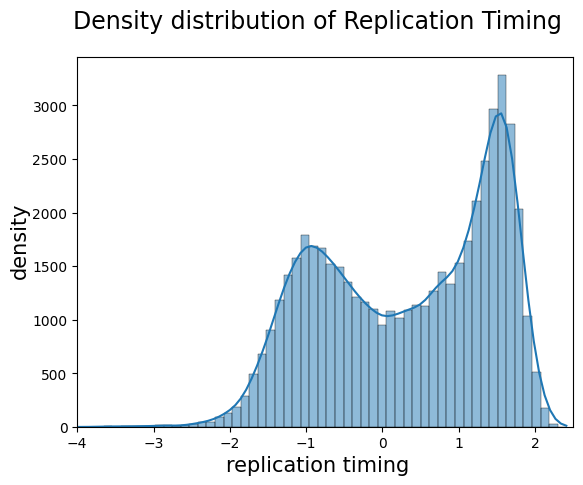

count    51346.000000
mean         0.339686
std          1.137047
min        -11.739400
25%         -0.698273
50%          0.524854
75%          1.401089
max          2.410063
Name: rep_timing, dtype: float64

In [57]:


fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True)
sns.histplot (df.rep_timing, kde=True)
axs.set_xlim(-4,2.5)
fig.suptitle('Density distribution of Replication Timing', size=17)
fig.supxlabel('replication timing', size=15)
fig.supylabel('density', size=15)
axs.set_xlabel('')
axs.set_ylabel('')
plt.show()
df.rep_timing.describe()


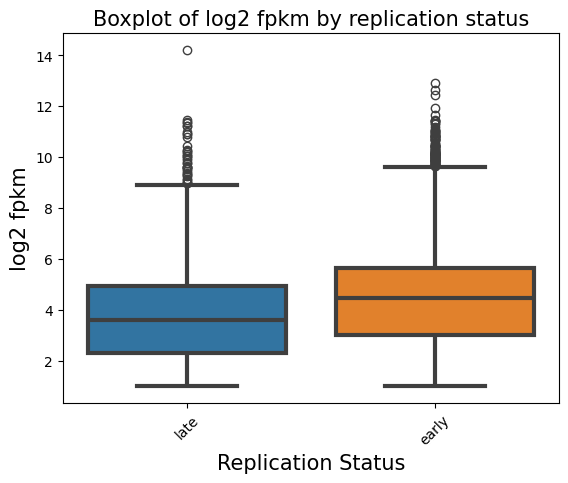

In [62]:


# splitting the replication timing into early and late at 50^th percentile

df['rep_status'] = df['rep_timing'].apply(lambda x: 'early' if x >= 0.52 else 'late')
df['is_early'] = df['rep_status'].apply(lambda x: 1 if x == 'early' else 0)

sns.boxplot(y=df[df.log2_fpkm > 0]['log2_fpkm'], x=df.rep_status, hue=df.rep_status, linewidth=3) #hue adds color based on the rep_status
plt.xticks(rotation=45, size=10)
plt.yticks(size=10)
plt.xlabel('Replication Status', size=15)
plt.ylabel('log2 fpkm', size=15)
plt.title('Boxplot of log2 fpkm by replication status', size=15)
plt.show()



`Quantile normalization` is a technique used to make the distribution of expression data (e.g., FPKM, TPM) across samples uniform.

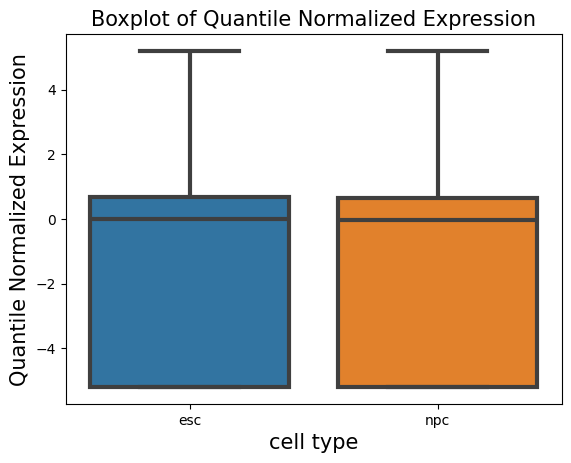

rep_status,early,late
chr,,
chr1,33.633333,26.161765
chr10,50.359019,14.646081
chr11,53.529968,14.146893
chr12,34.959427,10.545024
chr13,28.320988,14.928713
...,...,...
chrJH584293.1,NaN,0.000000
chrJH584294.1,NaN,0.000000
chrMT,NaN,2340.230769


In [ ]:


# Quantile Normalization for the expression data
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', random_state=0)
exp_qn = qt.fit_transform(df[['esc_max_exp', 'npc_max_exp']])
exp_qn = pd.DataFrame(max_exp_qn, columns=['esc_max_exp_qn', 'npc_max_exp_qn'])
df['esc_max_exp_qn'] = max_exp_qn['esc_max_exp_qn']
df['npc_max_exp_qn'] = max_exp_qn['npc_max_exp_qn']
sns.boxplot(max_exp_qn, linewidth=3)
plt.xticks([0, 1], ['esc', 'npc'], size=10)
plt.ylabel('Quantile Normalized Expression', size=15)
plt.xlabel('cell type', size=15)
plt.title('Boxplot of Quantile Normalized Expression', size=15)
plt.show()

# pivot table
df.pivot_table(index='chr', columns='rep_status', values='fpkm', aggfunc='mean')        # mean of fpkm by chromosome and replication status




## **Filtering data**


In [138]:

# picking only chromosome 1, biological features and physical attrubutes
chr1 = df[df['chr'] == 'chr1'].copy()
m = chr1[['strand', 'gene_length', 'log2_fpkm', 'esc_max_exp_qn', 'npc_max_exp_qn', 'rep_timing','expression_breadth', 'dist_from_surf', 'dist_from_com', 'tasa']].copy()
m = m.dropna()
m.info()
m.sample(10)



<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 1 to 9211
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   strand              417 non-null    int64  
 1   gene_length         417 non-null    int64  
 2   log2_fpkm           417 non-null    float64
 3   esc_max_exp_qn      417 non-null    float64
 4   npc_max_exp_qn      417 non-null    float64
 5   rep_timing          417 non-null    float64
 6   expression_breadth  417 non-null    float64
 7   dist_from_surf      417 non-null    float64
 8   dist_from_com       417 non-null    float64
 9   tasa                417 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 35.8 KB


,strand,gene_length,log2_fpkm,esc_max_exp_qn,npc_max_exp_qn,rep_timing,expression_breadth,dist_from_surf,dist_from_com,tasa
7409,1,17308,0.000000,-0.000669,-5.199338,1.102467,18.0,0.612949,1.303612,0
456,-1,63855,3.807355,0.099340,0.722359,-0.029129,32.0,0.578227,2.471603,0
2792,1,18136,3.807355,1.309479,-5.199338,0.840785,32.0,0.629930,0.743224,2
26,1,1009,0.000000,-5.199338,-5.199338,-0.580993,1.0,0.491386,0.226049,0
2771,-1,9974,0.000000,0.233095,0.447576,1.572007,32.0,0.927293,0.404028,0
45,1,3270,0.000000,-5.199338,-5.199338,0.169885,32.0,0.881225,0.222882,0
8568,1,43668,3.321928,0.414099,0.575962,-0.388915,32.0,0.511638,0.477192,0
6905,-1,42074,1.000000,0.328103,1.096565,1.614466,32.0,0.616041,1.667846,0
5130,1,10181,0.000000,-0.482699,-5.199338,1.550653,23.0,0.550165,1.523243,0
3970,-1,80834,5.459432,0.441917,0.916304,0.059894,32.0,0.787982,1.946885,0


## **Model Fitting**

#### Predicting gene expression using biological features

In [122]:

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Create a new dataframe with the selected features
X = m[['strand', 'gene_length' , 'rep_timing', 'expression_breadth']]
y = m['log2_fpkm']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model, fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: R-squared)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"MSE: {mse}")



R-squared: 0.2590237819729979
MSE: 4.61097513611721


#### Predicting gene expression using physical attributes

In [123]:

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Create a new dataframe with the selected features
X = m[['dist_from_surf', 'dist_from_com', 'tasa']]
y = m['log2_fpkm']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model, fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: R-squared)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"MSE: {mse}")



R-squared: -0.016500415108325228
MSE: 6.325517642654637


#### Biolgical feautres vs physical attributes of the genome

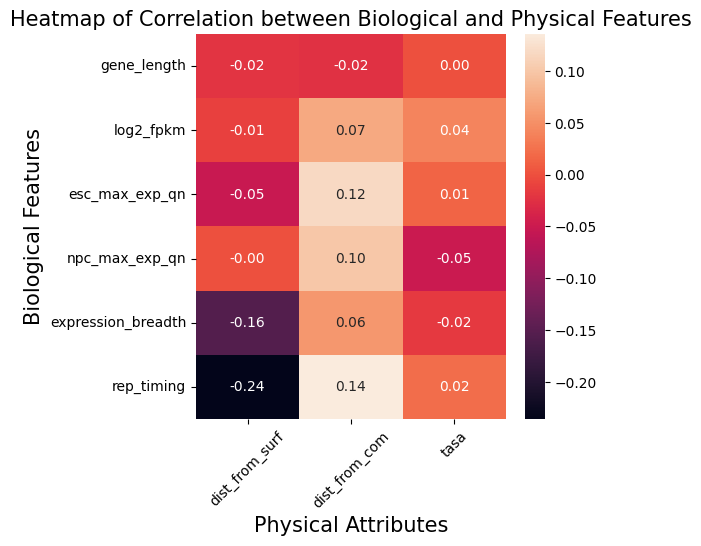

In [ ]:


# Extract the submatrix for the specified columns
b = ['gene_length', 'log2_fpkm', 'esc_max_exp_qn', 'npc_max_exp_qn', 'expression_breadth', 'rep_timing']
p = ['dist_from_surf', 'dist_from_com', 'tasa']

# Calculate the correlation matrix
corr_matrix = m[b + p].corr()
corr_matrix_subset = corr_matrix.loc[b, p]



# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='rocket') #removed duplicate cmap
plt.title("Heatmap of Correlation between Biological and Physical Features", size=15)
plt.xlabel("Physical Attributes", size=15)
plt.ylabel("Biological Features", size=15)
plt.xticks(rotation=45)
plt.show()



#### Predicting biological functions predict the Physical Attributes


In [ ]:
# Random Forest Regressor for multiple output regression

X = m[['dist_from_surf', 'dist_from_com', 'tasa']]
y = m[['strand', 'gene_length', 'log2_fpkm', 'esc_max_exp_qn', 'npc_max_exp_qn', 'rep_timing', 'expression_breadth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

clf = MultiOutputRegressor(RandomForestRegressor()).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)



-0.2465334519958528

#### Predicting Physical Attributes predict the biological functions

In [129]:


X = m[['strand', 'gene_length', 'log2_fpkm', 'esc_max_exp_qn', 'npc_max_exp_qn', 'rep_timing', 'expression_breadth']]
y = m[['dist_from_surf', 'dist_from_com', 'tasa']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

clf = MultiOutputRegressor(RandomForestRegressor()).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


-0.030105425864967672

#### Predicting gene expression using a combination of Biological features and physical attributes

In [131]:


X = m[['strand', 'gene_length', 'esc_max_exp_qn', 'npc_max_exp_qn', 'rep_timing', 'expression_breadth', 'dist_from_surf', 'dist_from_com', 'tasa']]
y = m['log2_fpkm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate using regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.3318001312749953
Mean Squared Error: 4.15809968753343


Using **Support Vector Regressor**

In [ ]:


from sklearn.svm import SVR

rf = SVR()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: -0.021476644403053857
Mean Squared Error: 6.356483912544793


#### Clustering all the features to check pair-wise corraltion between them

<Figure size 1200x1000 with 0 Axes>

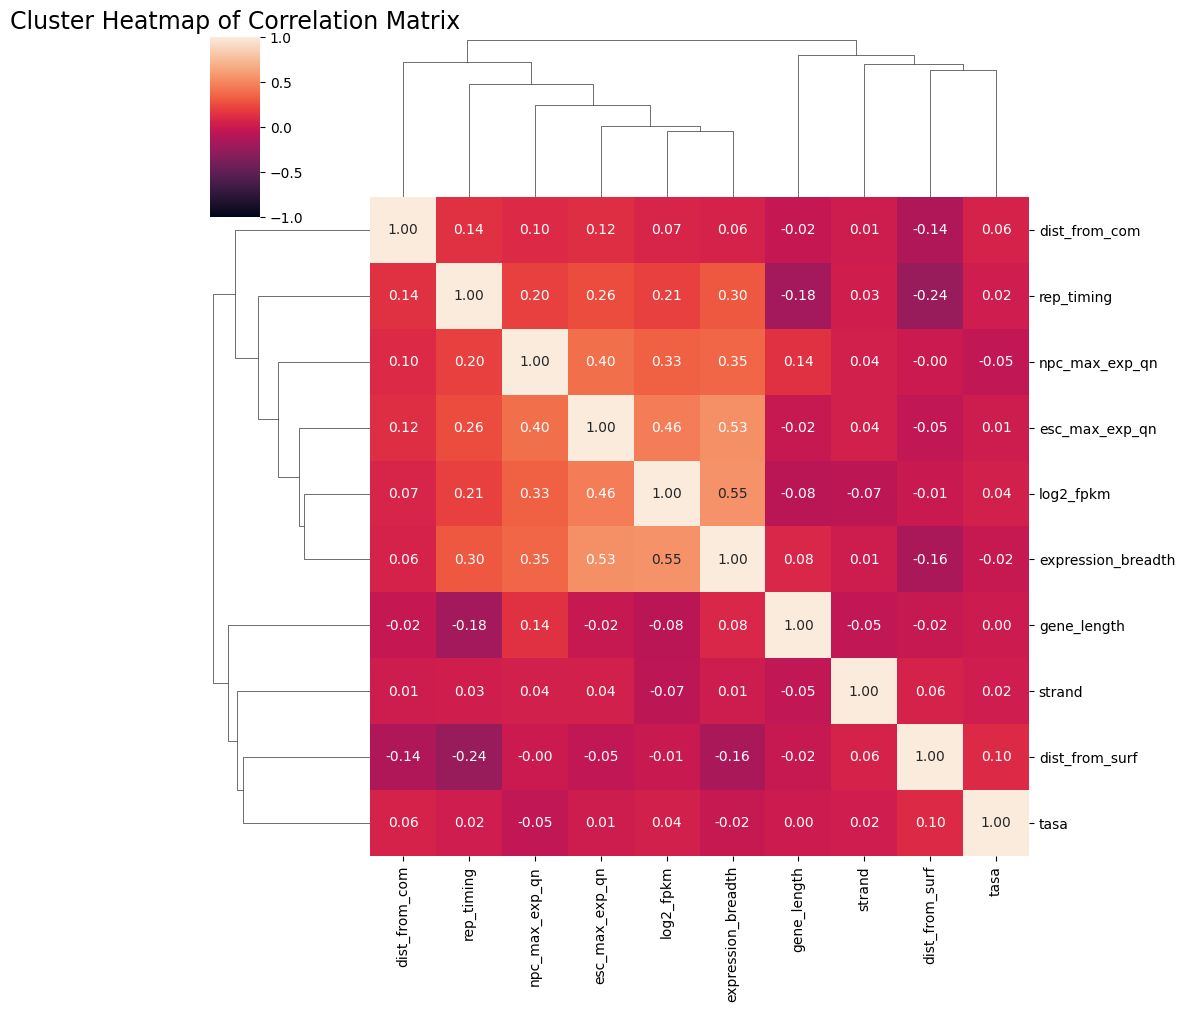

In [139]:
# prompt: create a cluster heatmap of m

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'm' is defined as in your provided code
# ... (your existing code to define 'm')

# Calculate the correlation matrix
corr_matrix = m.corr()

# Create the clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, annot=True, fmt=".2f", cmap='rocket', vmin=-1, vmax=1)
plt.title("Cluster Heatmap of Correlation Matrix", size=17)
plt.show()

### **Conclusion**

Gene expression, often regarded as the Holy Grail of genetics and epigenetics, was the focus of this study, aiming to predict it using biological features and physical attributes. While neither set of features alone could accurately predict gene expression, the predictive power improved significantly when both were used in combination. This highlights the interplay between biological and physical determinants of gene expression.

-A comparative analysis of biological features and physical attributes revealed no major significant correlations overall. However, certain attributes, such as replication timing and expression breadth, showed subtle biases toward some physical features.

-To strengthen these findings, further analysis is needed with larger datasets, incorporating additional biological features—such as epigenetic markers—and physical attributes that better quantify the genome's architecture. This expanded approach could unveil more robust patterns and insights into the complex relationship between gene expression, biological features, and 3D genome organization.


### **Future Directions**

This project has the potential to grow into a powerful tool for understanding the complexities of the genome and addressing some of the most pressing challenges in biology and medicine. Moving forward, I envision several exciting opportunities to enhance its scope and impact:

1. **`Broadening Biological Insights`**:  
   To truly grasp the intricacies of gene regulation and expression, it is essential to integrate additional biological features, such as:
   - Epigenetic markers that capture the dynamic modifications of DNA,
   - Histone modifications that influence chromatin accessibility,
   - Protein binding sites critical for transcriptional regulation,
   - SNPs that reflect genetic variability, and
   - Functional pathways to connect genes to their roles in cellular processes.  

   With these additions, we can move closer to understanding the genome as a living, breathing system.

2. **`Deepening Our Understanding of 3D Genome Architecture`**: 
   - **Radius of Gyration**, a measure of the genome's compactness,  
   - **Local chromosome density martices**, which reflects spatial gene clustering,
   - **Distance metrices**,  can calculate the spatial relationships between loci or other features in 3D space.
   - **Persistence Homology**, can capture the topological features of a 3D structure (e.g., loops, voids) across different scales.
   - **Fractal Dimension Analysis**, can quantifie the complexity of a 3D structure, such as chromatin, across different scales.
   we can gain deeper insights into the physical organization of the genome.  

   Moreover, viewing chromosomes through the lens of **networks and graphs** will enable us to quantify their properties as dynamic systems, revealing connections that were previously hidden.

3. **`Harnessing Machine Learning`**:  
   With enriched datasets and a multidimensional feature set, machine learning models and neural networks can be trained with greater ease and precision. This opens the door to high predictive power, allowing us to explore the genome's mysteries in ways that were previously unimaginable.

4. **`Driving Real-World Impact`**:  
   The ultimate goal is to translate these findings into actionable solutions. By leveraging these models, we can:
   - Accelerate **drug discovery**,
   - Enhance our understanding of **antigen-antibody interactions**,
   - Identify novel strategies to target **cancerous genes**, and  
   - Explore countless other applications that touch human lives.  

   The possibilities are vast and deeply inspiring.



# **END**